# Part I: Supervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [3]:
df =pd.read_csv('bank.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

### Missing Value Analysis (checking null/missing values)

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### inference: no missing or null value found

#### Handling duplicate values

In [6]:
df.duplicated().sum()

12

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [10]:
cat_cols = [i for i in df.columns if df[i].dtypes=='object']
num_cols = [i for i in df.columns if df[i].dtypes!='object']

print(cat_cols,'\n\n')
print(num_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'] 


['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [11]:
for i in num_cols:
    print(df[i].index)
    print(df[i].value_counts())
    

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186,
            41187],
           dtype='int64', length=41176)
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186,
            41187],
           dtype='int64', length=41176)
90      170
85      170
136     168
73      167
124     163
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 

 inference: there no categorical type column in numerical columns

###  primary analysis of several categorical features


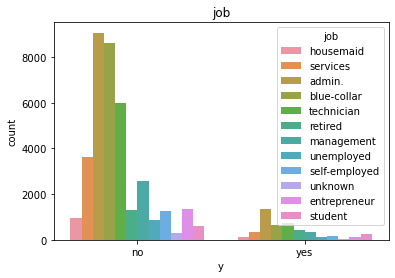

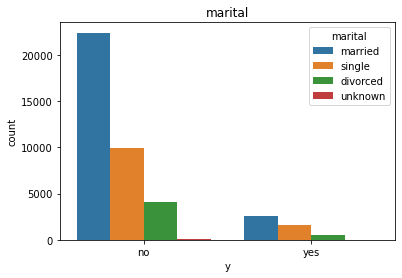

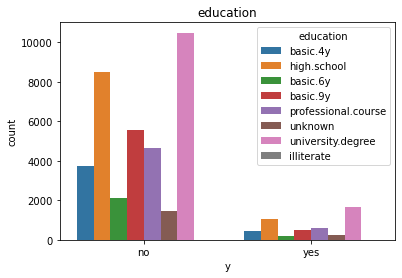

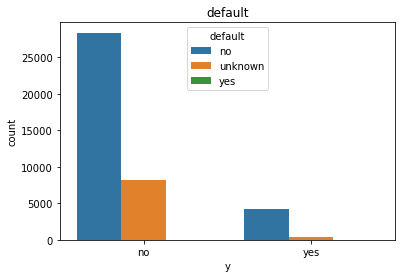

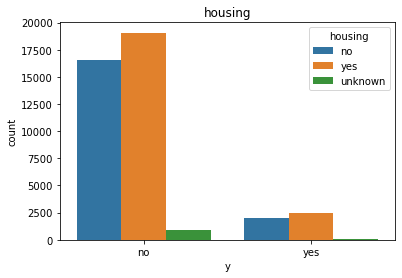

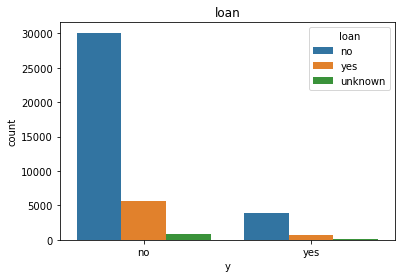

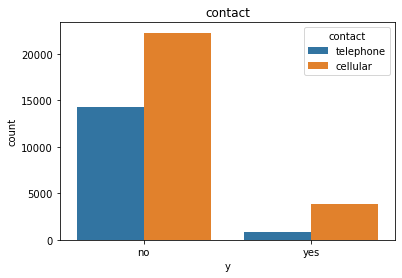

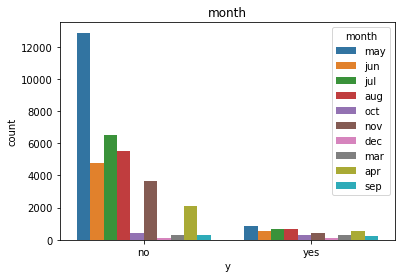

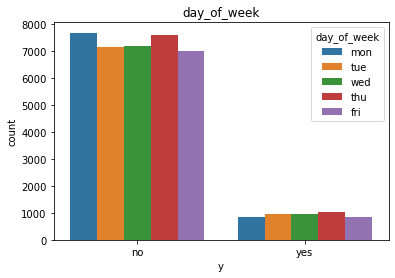

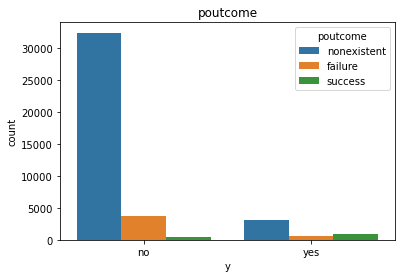

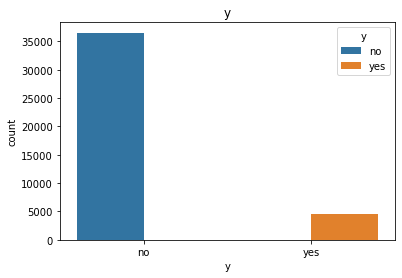

In [12]:
for i in cat_cols:
    sns.countplot(x=df['y'],hue=df[i])
    plt.title(i)
    plt.show()

#### inference:
    
    job: category from whom most people subscribed-> admin and category from whom most people who did not subscribed->admin  
   
    marital: category from whom most people subscribed-> married and category from whom most people who did not subscribed->married  
    
    education:category from whom most people subscribed->illiterate and category from whom most people who did not subscribed->illiterate  
    
    default:category from whom most people subscribed-> non-defaulters and category from whom most people who did not subscribed->non defaulters  
    
    housing:category from whom most people subscribed-> having house loan and category from whom most people who did not subscribed->having house loan  
    
    loan:category from whom most people subscribed-> having no loan and category from whom most people who did not subscribed-> having no loan  
    
    contact: category from whom most people subscribed-> cellular user and category from whom most people who did not subscribed->cellular user  
    
    month: people who have may as their last contact month subscibred the most from people of all other month and people who have may as their last contact month are also the one in majority who have not subscribed the most  
    
    day_of_week: people whom we last contacted on monday are the one who didn't subscribed the most and people whom we last contacted on thursday are the one who did subscribed the most    
    
    poutcome: as per previous market analysis people who subscribed the most are nonexistent and people who didnt subscribed are also nonexistent  

In [13]:
df['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [14]:
# here in education we get 3 similar category(basic.4y,basic.9y,basic.6y) we can club them 
# to reduce our different types in this column

In [15]:
df['education'] = df['education'].replace(['basic.9y','basic.4y','basic.6y','basic'])
df['education'].value_counts()

university.degree      17060
high.school            14059
professional.course     7482
unknown                 2556
illiterate                18
basic.4y                   1
Name: education, dtype: int64

### Checking/handling outliers

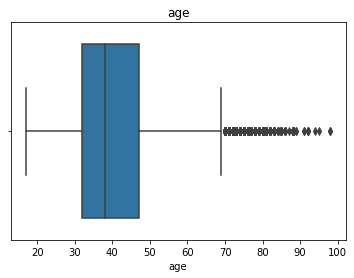

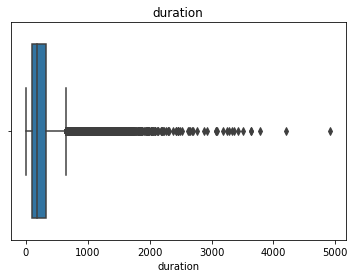

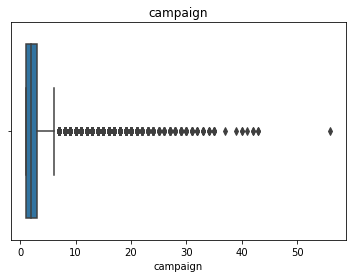

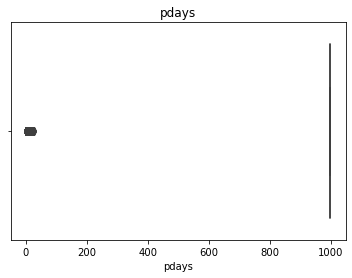

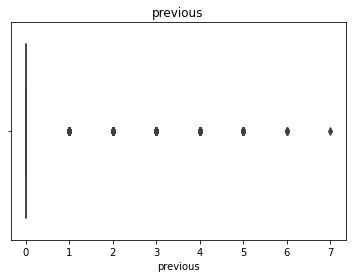

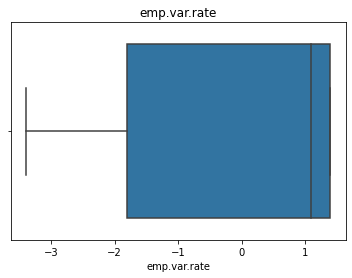

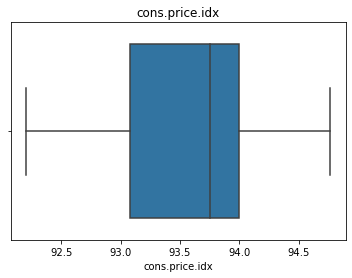

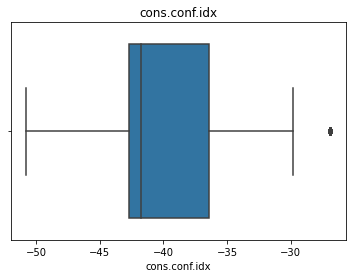

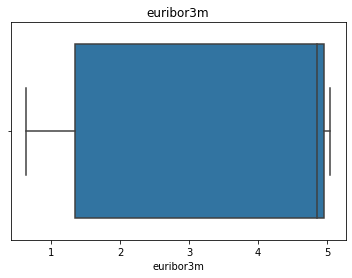

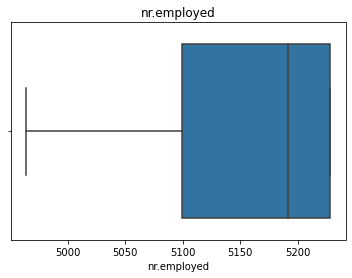

In [16]:
for i in num_cols: # for finding outliers 
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

#### inference: age , duration,campaign,previous have outliers in large amount and pdays,cons.conf.idx have minimal outliers

In [17]:
df.describe(percentiles=[0.01,0.02,0.03,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,50%,97%,98%,99%,max
age,41176.0,40.023800,10.420680,17.000,23.000,24.000,25.000,38.000,59.000,62.000,71.000,98.000
duration,41176.0,258.315815,259.305321,0.000,11.000,17.000,23.000,180.000,911.000,1052.500,1271.250,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,1.000,1.000,2.000,9.000,11.000,14.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,3.000,6.000,9.000,999.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,0.000,1.000,2.000,2.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-3.400,-3.400,-3.000,1.100,1.400,1.400,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,92.201,92.379,92.431,93.749,94.465,94.465,94.465,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-49.500,-47.100,-47.100,-41.800,-31.400,-30.100,-26.900,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,0.658,0.714,0.720,4.857,4.967,4.968,4.968,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,4963.600,4991.600,4991.600,5191.000,5228.100,5228.100,5228.100,5228.100


outliers found in age(min,max) ,duration,campaign,previous,nr_employed(min) and from graph we have found outliers in columns other these columns so its better to apply outlier treatement on them also

In [18]:
def outliers_handle(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return x

In [19]:
outliers_cols = ['age','duration','campaign','previous','nr.employed', 'pdays','cons.conf.idx']

df[outliers_cols] = df[outliers_cols].apply(outliers_handle)

#### Checing for correlation

In [20]:
corr =df.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000761,0.005342,-0.029646,0.018539,0.007575,0.004531,0.128480,0.019279,-0.007821
duration,-0.000761,1.000000,-0.074140,-0.052480,0.023255,-0.031400,0.004875,-0.008990,-0.037546,-0.050009
campaign,0.005342,-0.074140,1.000000,0.057582,-0.090222,0.158474,0.128326,-0.012828,0.141089,0.151729
pdays,-0.029646,-0.052480,0.057582,1.000000,-0.571331,0.271066,0.078917,-0.093031,0.296950,0.372668
previous,0.018539,0.023255,-0.090222,-0.571331,1.000000,-0.453136,-0.248271,-0.059083,-0.480342,-0.513392
emp.var.rate,0.007575,-0.031400,0.158474,0.271066,-0.453136,1.000000,0.775293,0.195359,0.972244,0.906949
cons.price.idx,0.004531,0.004875,0.128326,0.078917,-0.248271,0.775293,1.000000,0.060230,0.688180,0.521945
cons.conf.idx,0.128480,-0.008990,-0.012828,-0.093031,-0.059083,0.195359,0.060230,1.000000,0.276638,0.097848
euribor3m,0.019279,-0.037546,0.141089,0.296950,-0.480342,0.972244,0.688180,0.276638,1.000000,0.945146
nr.employed,-0.007821,-0.050009,0.151729,0.372668,-0.513392,0.906949,0.521945,0.097848,0.945146,1.000000


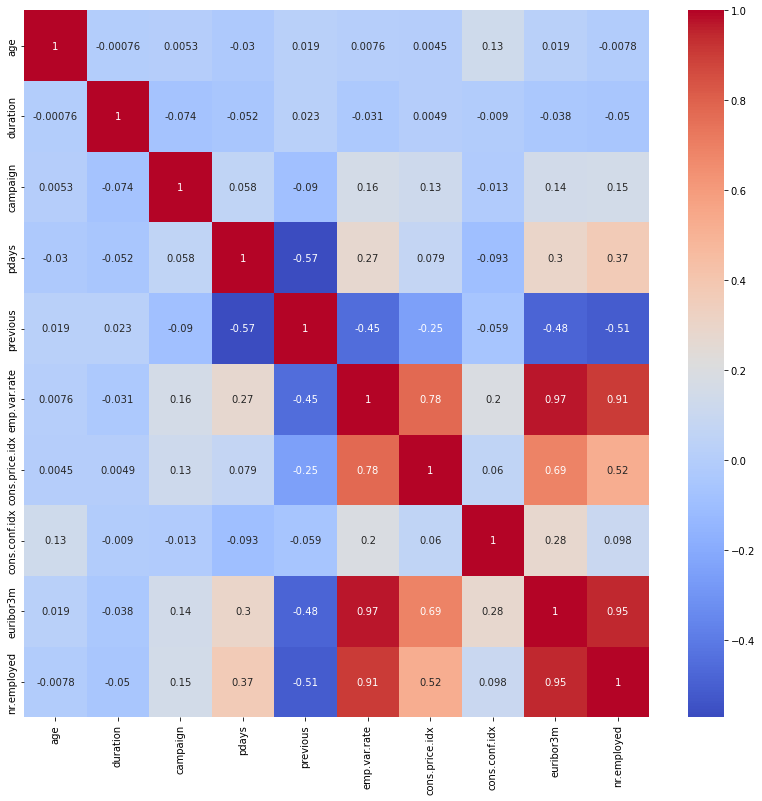

In [21]:
plt.figure(figsize=(14,13))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

we can exclude nr_employed , euribor3m, emp.var.rate but for now we will check feature importance then decide which column will be excluded

In [22]:
df1 = df.copy()
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,high.school,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lb = LabelEncoder()
for i in cat_cols:
    df1[i] = lb.fit_transform(df1[i])

In [25]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,1,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,1,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,1,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [26]:
df1.dtypes.value_counts()

int32      11
float64    10
dtype: int64

In [27]:
x = df1.drop('y',axis=1)
y =df['y']

print(x.shape)
print(y.shape)

(41176, 20)
(41176,)


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30882, 20)
(10294, 20)
(30882,)
(10294,)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [31]:
def gen_metrics(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Prediction\n',y_pred)
    print('Training score',train_score)
    print('Testing score',test_score)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))
    auc_score  = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('AUC Score',auc_score)
    return acc,auc_score,train_score,test_score


In [32]:
m1 = RandomForestClassifier(n_estimators=120,criterion='gini',max_depth=12,min_samples_split=15)

acc,auc_score1,train_score1,test_score1=gen_metrics(m1,x_train,x_test,y_train,y_test)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'no']
Training score 0.945923191503141
Testing score 0.9149018845929667
Accuracy_Score 0.9149018845929667
Confusion Matrix
 [[8840  292]
 [ 584  578]]
Classification Report
               precision    recall  f1-score   support

          no       0.94      0.97      0.95      9132
         yes       0.66      0.50      0.57      1162

    accuracy                           0.91     10294
   macro avg       0.80      0.73      0.76     10294
weighted avg       0.91      0.91      0.91     10294

AUC Score 0.944581404272996


In [33]:
print(acc,auc_score1,train_score1,test_score1)

0.9149018845929667 0.944581404272996 0.945923191503141 0.9149018845929667


####  Selecting important features based on Random Forest

In [34]:
fimp_m1 = pd.DataFrame({'Features':x_train.columns,
                       'Norm_Imp':m1.feature_importances_*100}) # m1.feature_importances_*100 for converting it into percentage

fimp_m1.sort_values('Norm_Imp',ascending=False)

,Features,Norm_Imp
10,duration,39.125977
19,nr.employed,12.727646
18,euribor3m,10.741214
14,poutcome,5.391547
12,pdays,4.962303
0,age,4.224970
17,cons.conf.idx,3.465264
16,cons.price.idx,2.878607
15,emp.var.rate,2.818509
8,month,2.176450


#### threshold taking for selecting important features is 1.780250

In [35]:
sig_feat = fimp_m1[fimp_m1['Norm_Imp']>=1.780250]

sig_feat.sort_values(by='Norm_Imp',ascending=False)

,Features,Norm_Imp
10,duration,39.125977
19,nr.employed,12.727646
18,euribor3m,10.741214
14,poutcome,5.391547
12,pdays,4.962303
0,age,4.224970
17,cons.conf.idx,3.465264
16,cons.price.idx,2.878607
15,emp.var.rate,2.818509
8,month,2.176450


In [36]:
x_sig = df1[sig_feat['Features'].values]
x_sig


,age,job,month,day_of_week,duration,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,6,1,261.0,1.0,999.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,6,1,149.0,1.0,999.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,6,1,226.0,1.0,999.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,6,1,151.0,1.0,999.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,6,1,307.0,1.0,999.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,71.0,5,7,0,334.0,1.0,999.0,1,-1.1,94.767,-49.5,1.028,4963.6
41184,46.0,1,7,0,383.0,1.0,999.0,1,-1.1,94.767,-49.5,1.028,4963.6
41185,56.0,5,7,0,189.0,2.0,999.0,1,-1.1,94.767,-49.5,1.028,4963.6
41186,44.0,9,7,0,442.0,1.0,999.0,1,-1.1,94.767,-49.5,1.028,4963.6


here we have selected important features based on Random forest<br>
its not clear in question that we need to use this significant features in model building but its wriiten that we need to select imp features so after selecting we have to utilized them so we are going to use these features in model building rather than using full datafram features


## Handling unbalanced data using SMOTE

In [37]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [38]:
Counter(y)

Counter({'no': 36537, 'yes': 4639})

inference: data is clearly imbalanced

In [39]:
print(x_sig.shape)
print(y.shape)

(41176, 13)
(41176,)


In [40]:
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x_sig,y)

In [41]:
print(x_sm.shape)
print(x_test.shape)

print(y_sm.shape)
print(y_test.shape)

(73074, 13)
(10294, 20)
(73074,)
(10294,)


### Standardize the data using the anyone of the scalers provided by sklearn


note: usually standardization applied before splitting but here we have already splitted because its provided in the problem statement so now we have to apply scalling on all train and test features


In [42]:
from sklearn.preprocessing import StandardScaler

#### applying StandardScaler

In [43]:
sc = StandardScaler()

In [44]:
x_sm_std = sc.fit_transform(x_sm)

splitting new train test values

In [45]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_sm_std,y_sm,test_size=0.25,random_state=15)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)


(54805, 13)
(18269, 13)
(54805,)
(18269,)


In [46]:
models = pd.DataFrame(columns=["Model", "Accuracy", "auc_score", "training_score",'test_score'])
models

,Model,Accuracy,auc_score,training_score,test_score


# Building Supervised Models

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
m2 = LogisticRegression() 
m2.fit(x_train1,y_train1)

LogisticRegression()

In [48]:
acc,auc_score1,train_score1,test_score1=gen_metrics(m2,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.8651947814980385
Testing score 0.8643056543872133
Accuracy_Score 0.8643056543872133
Confusion Matrix
 [[7825 1382]
 [1097 7965]]
Classification Report
               precision    recall  f1-score   support

          no       0.88      0.85      0.86      9207
         yes       0.85      0.88      0.87      9062

    accuracy                           0.86     18269
   macro avg       0.86      0.86      0.86     18269
weighted avg       0.86      0.86      0.86     18269

AUC Score 0.9337138216613657


In [80]:
new_row = {"Model": "LogisticRegression","Accuracy":acc, "auc_score":auc_score1, "training_score":train_score1,'test_score':test_score1}
models = models.append(new_row,ignore_index=True)
models

,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.864306,0.933714,0.865195,0.864306


## AdaBoost

In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
clf = AdaBoostClassifier(random_state=96)

In [72]:
acc2,auc_score2,train_score2,test_score2=gen_metrics(clf,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.9058844995894535
Testing score 0.9059061798675352
Accuracy_Score 0.9059061798675352
Confusion Matrix
 [[8284  923]
 [ 796 8266]]
Classification Report
               precision    recall  f1-score   support

          no       0.91      0.90      0.91      9207
         yes       0.90      0.91      0.91      9062

    accuracy                           0.91     18269
   macro avg       0.91      0.91      0.91     18269
weighted avg       0.91      0.91      0.91     18269

AUC Score 0.9693400880990319


In [81]:
new_row = {"Model": "AdaBoost","Accuracy":acc2, "auc_score":auc_score2, "training_score":train_score2,'test_score':test_score2}
models = models.append(new_row,ignore_index=True)
models

,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.864306,0.933714,0.865195,0.864306
1,AdaBoost,0.905906,0.969340,0.905884,0.905906


## Naïve Bayes


In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [55]:
gaussiannb= GaussianNB(priors=[0.5,0.5])

In [56]:
acc3,auc_score3,train_score3,test_score3=gen_metrics(gaussiannb,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.7933947632515281
Testing score 0.7955005747441021
Accuracy_Score 0.7955005747441021
Confusion Matrix
 [[7288 1919]
 [1817 7245]]
Classification Report
               precision    recall  f1-score   support

          no       0.80      0.79      0.80      9207
         yes       0.79      0.80      0.80      9062

    accuracy                           0.80     18269
   macro avg       0.80      0.80      0.80     18269
weighted avg       0.80      0.80      0.80     18269

AUC Score 0.8823905239689692


In [82]:
new_row = {"Model": "Naive_gaussian","Accuracy":acc3, "auc_score":auc_score3, "training_score":train_score3,'test_score':test_score3}
models = models.append(new_row,ignore_index=True)
models

,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.864306,0.933714,0.865195,0.864306
1,AdaBoost,0.905906,0.969340,0.905884,0.905906
2,Naive_gaussian,0.795501,0.882391,0.793395,0.795501


## KNN


In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=7)

In [74]:
acc4,auc_score4,train_score4,test_score4=gen_metrics(gaussiannb,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.7933947632515281
Testing score 0.7955005747441021
Accuracy_Score 0.7955005747441021
Confusion Matrix
 [[7288 1919]
 [1817 7245]]
Classification Report
               precision    recall  f1-score   support

          no       0.80      0.79      0.80      9207
         yes       0.79      0.80      0.80      9062

    accuracy                           0.80     18269
   macro avg       0.80      0.80      0.80     18269
weighted avg       0.80      0.80      0.80     18269

AUC Score 0.8823905239689692


In [83]:
new_row = {"Model": "KNN","Accuracy":acc4, "auc_score":auc_score4, "training_score":train_score4,'test_score':test_score4}
models = models.append(new_row,ignore_index=True)
models

,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.864306,0.933714,0.865195,0.864306
1,AdaBoost,0.905906,0.969340,0.905884,0.905906
2,Naive_gaussian,0.795501,0.882391,0.793395,0.795501
3,KNN,0.795501,0.882391,0.793395,0.795501


## SVM

In [62]:
from sklearn.svm import SVC

In [63]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

note: tried to do random search in this model but it took more than 1 hour but stiill didnt get executed so i switched to single single run

In [86]:
hparams_svc = {'kernel':['linear','poly'],
              'C':[0.001,0.01,0.1,1,10],
              'degree':[1,2,3]}

print(hparams_svc)

{'kernel': ['linear', 'poly'], 'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [1, 2, 3]}


model_svc = SVC()<br>
rs = RandomizedSearchCV(model_svc,param_distributions=hparams_svc,scoring='accuracy')<br>
acc5,auc_score5,train_score5,test_score5=gen_metrics(rs,x_train1,x_test1,y_train1,y_test1)<br>


In [66]:
svc1 = SVC(kernel='linear',C=1,probability=True)
acc5,auc_score5,train_score5,test_score5=gen_metrics(svc1,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.8687710975275978
Testing score 0.8668235809294433
Accuracy_Score 0.8668235809294433
Confusion Matrix
 [[7550 1657]
 [ 776 8286]]
Classification Report
               precision    recall  f1-score   support

          no       0.91      0.82      0.86      9207
         yes       0.83      0.91      0.87      9062

    accuracy                           0.87     18269
   macro avg       0.87      0.87      0.87     18269
weighted avg       0.87      0.87      0.87     18269

AUC Score 0.9322575239680344


In [84]:
new_row = {"Model": "SVM_linear","Accuracy":acc5, "auc_score":auc_score5, "training_score":train_score5,'test_score':test_score5}
models = models.append(new_row,ignore_index=True)
models

,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.864306,0.933714,0.865195,0.864306
1,AdaBoost,0.905906,0.969340,0.905884,0.905906
2,Naive_gaussian,0.795501,0.882391,0.793395,0.795501
3,KNN,0.795501,0.882391,0.793395,0.795501
4,SVM_linear,0.866824,0.932258,0.868771,0.866824


In [70]:
svc2 = SVC(kernel='poly',degree=3,probability=True)
acc6,auc_score6,train_score6,test_score6=gen_metrics(svc2,x_train1,x_test1,y_train1,y_test1)

Prediction
 ['yes' 'no' 'no' ... 'yes' 'no' 'yes']
Training score 0.8986406349785604
Testing score 0.8959986862991953
Accuracy_Score 0.8959986862991953
Confusion Matrix
 [[7893 1314]
 [ 586 8476]]
Classification Report
               precision    recall  f1-score   support

          no       0.93      0.86      0.89      9207
         yes       0.87      0.94      0.90      9062

    accuracy                           0.90     18269
   macro avg       0.90      0.90      0.90     18269
weighted avg       0.90      0.90      0.90     18269

AUC Score 0.9515574101508988


In [85]:
new_row = {"Model": "SVM_Poly","Accuracy":acc6, "auc_score":auc_score6, "training_score":train_score6,'test_score':test_score6}
models = models.append(new_row,ignore_index=True)
models

,Model,Accuracy,auc_score,training_score,test_score
0,LogisticRegression,0.864306,0.933714,0.865195,0.864306
1,AdaBoost,0.905906,0.969340,0.905884,0.905906
2,Naive_gaussian,0.795501,0.882391,0.793395,0.795501
3,KNN,0.795501,0.882391,0.793395,0.795501
4,SVM_linear,0.866824,0.932258,0.868771,0.866824
5,SVM_Poly,0.895999,0.951557,0.898641,0.895999


### INFERENCE : we can see that accuracy, training and testing score of AdaBoost is far better than the other models so according to tabular performance matrix AdaBoost is best suited model